### Chapter 1: Introduction

In [110]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Example: Polynomial Curve Fitting

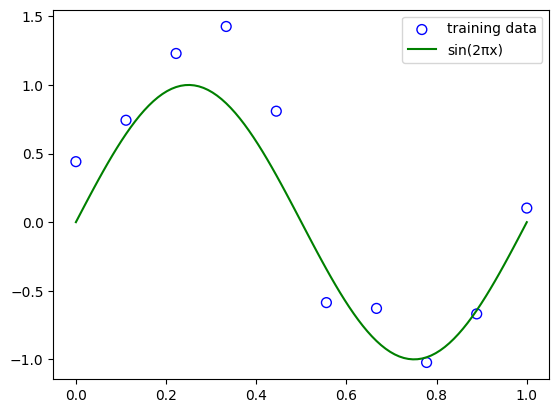

In [111]:
# Create a function to generate 20 data points from a sine wave with Gaussian noise
def generate_data(func, n, std, random_seed=0):
    np.random.seed(random_seed) # Set a random seed for reproducibility
    X = np.linspace(0, 1, n) # Create n evenly spaced points between 0 and 1
    t = func(X) + np.random.normal(scale=std, size=n) # Create n target values with Gaussian noise of std
    return X, t

def func(x):
    return np.sin(2*np.pi*x) # Create a sine wave function with x as the input, x can be a scalar or a vector


x_train, y_train = generate_data(func,10,0.25) # Generate 20 data points from a sine wave with Gaussian noise
x_test = np.linspace(0, 1, 100) # Create 100 evenly spaced points between 0 and 1
y_test = func(x_test) # Create 100 target values without noise
y_test_2 = generate_data(func,100,0.25)[1] # Create 100 target values with noise

# Create a function to plot the data and the sine wave
def plot_data(X, t, x, y, label1="training data", label2 = "sin(2πx)"):
    plt.scatter(X, t, facecolor="none", edgecolor="b", s=50, label=label1) # s means size, facecolor means the color of the dots, edgecolor means the color of the edge of the dots
    plt.plot(x, y, c="g", label=label2) # c means color
    #plt.scatter(x,generate_data(func,100,0.1)[1],facecolor="none", edgecolor="b", s=50, label="training data")
    plt.legend()
    plt.show()

plot_data(x_train, y_train, x_test, y_test) # Plot the data and the sine wave

In [112]:
# Create a function to perform polynomial regression
def fit_polynomial(x, t, M):
    X = np.array([x**m for m in range(M+1)]).T # Create a Vandermonde matrix of x
    w = np.linalg.solve(X.T.dot(X), X.T.dot(t)) # Solve the normal equation to get the weights
    return w

In [113]:
W = fit_polynomial(x_test, y_test_2, 9) # Perform polynomial regression with M=3
W

array([ 3.55622429e-01,  2.65833190e+00, -5.43854665e+00,  2.35014314e+02,
       -1.74390714e+03,  5.30052171e+03, -8.67725625e+03,  8.11740857e+03,
       -4.08566827e+03,  8.56434019e+02])

In [114]:
# Create a function to predict the target values
def predict_polynomial(x, w):
    M = len(w)-1  # Get the order of the polynomial
    y = np.zeros_like(x) # Create an empty vector of the same size as x
    for m in range(M+1): #For total number of terms
        y += w[m] * x**m # Calculate each term of the polynomial
    return y

y_predicted = predict_polynomial(x_test, W) # Predict the target values of the test data
#y_predicted

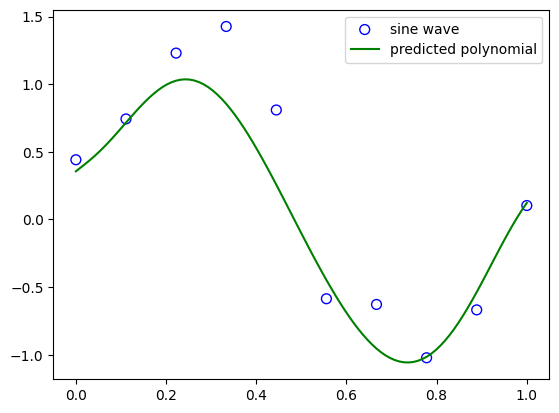

In [115]:

plot_data(x_train,y_train, x_test, y_predicted,label1="sine wave",label2="predicted polynomial") # Plot the data and the predicted polynomial

In [116]:
# Create a function to calculate the root mean squared error
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

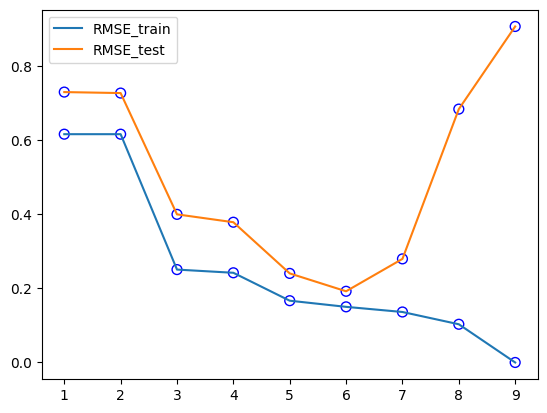

In [119]:
def rmse_plot(x_train, y_train, x_test, y_test):
    rmse_train_set, rmse_test_set = [],[] # Create numpy arrays to store the RMSE of the training and test data
    for i in range(1,10):
        W_train= fit_polynomial(x_train, y_train, i) # Perform polynomial regression with M in range 1 to 9
        y_predicted_train, y_predicted_test = predict_polynomial(x_train, W_train), predict_polynomial(x_test[:10], W_train) # Predict the target values of the test data
        rmse_train, rmse_test = rmse(y_train, y_predicted_train), rmse(y_test[:10], y_predicted_test) # Calculate the RMSE of the training and test data
        rmse_train_set.append(rmse_train), rmse_test_set.append(rmse_test) # Append the RMSE to the numpy arrays
    return np.array(rmse_train_set), np.array(rmse_test_set)

rmse_train_set, rmse_test_set = rmse_plot(x_train, y_train, x_test, y_test) # Plot the RMSE of the training and test data for each M
plt.scatter(range(1,10), rmse_train_set,facecolor="none", edgecolor="b", s=50)
plt.plot(range(1,10), rmse_train_set,  label="RMSE_train") 
plt.scatter(range(1,10), rmse_test_set,facecolor="none", edgecolor="b", s=50)
plt.plot(range(1,10), rmse_test_set, label="RMSE_test")
plt.legend()
plt.show()

In [118]:
# Create a function to perform polynomial regression with regularization
def fit_polynomial_regularized(x, t, M, alpha):
    X = np.array([x**m for m in range(M+1)]).T # Create a Vandermonde matrix of x
    w = np.linalg.solve(alpha*np.eye(M+1) + X.T.dot(X), X.T.dot(t)) # Solve the normal equation to get the weights
    return w